In [4]:
import pandas as pd
gse48581 = pd.read_csv('GSE48581.csv')
gse48581

,Unnamed: 0,DDR1 /// MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193 /// UBA7,THRA,PTPN21,CCL5,...,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,Diagnosis
0,GSM1181496,11.470281,7.907461,6.965705,11.435293,3.757472,8.628549,7.692872,5.538287,9.831144,...,9.897595,9.143688,9.779019,11.039537,10.455694,13.208906,12.411459,14.533467,14.236086,non-TCMR
1,GSM1181497,11.229925,8.043809,7.055036,11.149914,3.315159,8.244606,7.290996,5.378012,8.247645,...,9.827651,8.991790,9.800053,10.930397,10.420508,13.133785,12.540637,14.516156,14.274544,non-TCMR
2,GSM1181498,11.088060,7.656739,6.449851,11.075646,3.635014,8.249415,7.546280,5.586520,7.030063,...,9.548678,8.828183,9.411263,10.779396,10.312240,13.003317,12.298737,14.371308,14.141068,non-TCMR
3,GSM1181499,11.424030,7.719578,6.307674,11.124469,3.687385,8.208735,7.795157,5.519622,6.375276,...,9.778859,9.094259,9.549352,10.762561,10.288421,13.095126,12.259252,14.418170,14.192961,non-TCMR
4,GSM1181500,10.636565,7.714332,6.665597,10.814759,3.843610,8.061417,7.644351,5.587440,7.212195,...,10.070893,9.061685,9.790334,11.017493,10.499448,13.185713,12.547003,14.486119,14.258236,non-TCMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,GSM1181812,10.454048,7.706253,6.524251,10.607357,3.605969,8.460911,7.513208,5.416094,11.424121,...,7.995517,7.071609,7.489722,10.506278,9.999209,13.236914,12.404531,14.599733,14.394514,TCMR
302,GSM1181813,11.388653,7.807778,6.614894,11.171034,3.629013,7.898539,7.579380,5.531614,7.279399,...,6.964866,5.988232,6.426082,10.763412,10.261191,13.127948,12.523954,14.551507,14.329776,non-TCMR
303,GSM1181814,11.519708,7.760067,6.603103,11.364226,3.813848,7.736864,7.594289,5.319085,6.958215,...,9.762725,9.191578,9.420527,10.908478,10.432469,13.025978,12.159401,14.488154,14.230359,non-TCMR
304,GSM1181815,11.199254,7.673119,6.739547,11.152608,3.723227,8.171448,7.197212,5.525404,8.098440,...,9.689791,8.839342,9.492090,10.688527,10.284390,13.022372,12.415825,14.379308,14.081824,non-TCMR


In [5]:
gse48581 = gse48581.drop(columns=["Unnamed: 0"])
from sklearn.model_selection import train_test_split
# 创建一个新的二分类标签列
gse48581["Label"] = gse48581["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

# 选出特征（去掉 Rejection Status 和 Label 列）
X = gse48581.drop(columns=["Diagnosis", "Label"])
y = gse48581["Label"]

# 划分训练集和测试集 (80% 训练, 20% 测试)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

Model

RF

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 创建随机森林分类器
rf = RandomForestClassifier(n_estimators=500,
                            random_state=42,
                            n_jobs=-1)  # 使用所有CPU加速训练

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上评估
accuracy = rf.score(X_test, y_test)
print(f"随机森林模型在测试集上的准确率: {accuracy:.4f}")

随机森林模型在测试集上的准确率: 0.9022


In [8]:
# 获取特征重要性
feature_importances = rf.feature_importances_

# 创建 DataFrame
importance_df = pd.DataFrame({"Gene": X.columns, "Importance": feature_importances})

# 按重要性排序
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 取最重要的前 20 个基因
GSE48581_top_30_genes = importance_df.head(30)

print("随机森林筛选出的前 30 个重要基因:")
print(GSE48581_top_30_genes)

# 保存到 CSV
GSE48581_top_30_genes.to_csv("GSE48581_top_30_genes_rf.csv", index=False)

随机森林筛选出的前 30 个重要基因:
                          Gene  Importance
47878              238629_x_at    0.002577
48445                ANKRD22.1    0.002134
47974                   IRF1.1    0.002077
13516                  MEIS1.1    0.002008
42501             LOC100507073    0.001965
25816                  HLA-C.3    0.001912
44767                 SLC8A1.8    0.001885
53843                   HID1.1    0.001813
23123                 HOXA11.1    0.001755
52192                ST8SIA4.4    0.001705
30499                    SCMH1    0.001689
22033                   DLG3.2    0.001636
26782                   TYMP.1    0.001607
23758                  HLA-C.2    0.001454
48213                   FIGN.1    0.001452
26135                  KMT2D.1    0.001421
37163  LINC00086 /// LINC00087    0.001416
22953                 METTL3.1    0.001405
9522               LINC00491.2    0.001394
13362                    CXCL9    0.001368
19315                  TGFB2.1    0.001316
53394                  SYNE1.4    

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer

# 读取已筛选出的前 20 个重要基因
top_genes = pd.read_csv("GSE48581_top_30_genes_rf.csv")["Gene"].tolist()

# 存储 AUC 值
gene_auc_scores = {}

# 遍历每个基因，计算单变量 AUC
for gene in top_genes:
    X_gene = X[[gene]]  # 只取单个基因的表达数据

    # Impute missing values using the mean
    imputer = SimpleImputer(strategy='mean') # Create an imputer object
    X_gene_imputed = imputer.fit_transform(X_gene) # Impute missing values in X_gene

    model = LogisticRegression(solver='liblinear')  # 逻辑回归模型
    model.fit(X_gene_imputed, y[X_gene.index])  # 拟合模型, using the corresponding y values and imputed data
    y_pred_prob = model.predict_proba(X_gene_imputed)[:, 1]  # 预测概率, using imputed data
    auc = roc_auc_score(y[X_gene.index], y_pred_prob)  # 计算 AUC, using the corresponding y values
    gene_auc_scores[gene] = auc

# 转换为 DataFrame 并排序
auc_df = pd.DataFrame(list(gene_auc_scores.items()), columns=["Gene", "AUC"]).sort_values(by="AUC", ascending=False)

auc_df

,Gene,AUC
1,ANKRD22.1,0.809898
4,LOC100507073,0.788443
24,CCRN4L,0.768068
29,FAM26F.3,0.759132
0,238629_x_at,0.757659
25,CD8A,0.751964
3,MEIS1.1,0.744796
14,FIGN.1,0.742636
28,APOBEC3G,0.737824
19,CXCL9,0.737137


In [10]:
## Lasso
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=5000) # Create a Lasso regression object

lasso.fit(X, y)  # 训练模型
coef = lasso.coef_[0]
# 提取非零系数对应的基因
lasso_importance = pd.Series(coef, index=X.columns).abs().sort_values(ascending=False)

# 获取前 20 个基因
top_genes_lasso = lasso_importance.head(30)
#Rename the index instead of using columns
GSE50058_top_genes_lasso = top_genes_lasso.rename_axis("Gene").reset_index(name="Importance")
#top_genes_lasso.index.name = "Gene" # another way to rename index

print("Lasso 逻辑回归前 30 重要基因:")
print(top_genes_lasso)

# 保存到 CSV
GSE50058_top_genes_lasso.to_csv("GSE48581_top_genes_lasso.csv", header=True, index=False) #avoid having an extra index column

Lasso 逻辑回归前 30 重要基因:
CD63            0.104062
NR4A2.2         0.056644
CXCL13          0.051097
RGS1.2          0.047541
ADAMDEC1        0.043747
NR4A2.1         0.035312
RGS1            0.035261
MRPS22.3        0.028979
FCER1A.1        0.028420
NR4A2           0.027743
FOS             0.024886
ANO1.1          0.024822
MMRN1           0.024808
LIX1            0.024531
ATF3.2          0.023685
CCL18.1         0.023542
AGR2            0.022914
CTLA4.4         0.022442
235229_at       0.019815
230746_s_at     0.018204
234105_at       0.018042
RNASE2          0.017848
ZNF880          0.017630
MAMDC2          0.017216
PAPPA2.3        0.017189
1563719_a_at    0.016943
RGS5            0.016744
DNM3OS          0.016683
CYP27B1         0.016677
228750_at       0.016583
dtype: float64


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

# 读取已筛选出的前 30 个重要基因
top_genes = pd.read_csv("GSE48581_top_genes_lasso.csv")

# 存储 AUC 值
gene_auc_scores = {}

# 遍历每个基因，计算单变量 AUC
for index, row in top_genes.iterrows(): # Iterate through rows instead of columns
    gene = row['Gene']  # Get the gene name from the 'Gene' column
    X_gene = X[[gene]]  # 只取单个基因的表达数据
    model = LogisticRegression(solver='liblinear')  # 逻辑回归模型
    model.fit(X_gene, y)  # 拟合模型
    y_pred_prob = model.predict_proba(X_gene)[:, 1]  # 预测概率
    auc = roc_auc_score(y, y_pred_prob)  # 计算 AUC
    gene_auc_scores[gene] = auc


auc_df = pd.DataFrame(list(gene_auc_scores.items()), columns=["Gene", "AUC"]).sort_values(by="AUC", ascending=False)

print("Top 30 Genes based on AUC Score:")
auc_df

Top 30 Genes based on AUC Score:


,Gene,AUC
3,RGS1.2,0.825412
6,RGS1,0.814709
20,234105_at,0.814120
26,RGS5,0.805283
17,CTLA4.4,0.776218
14,ATF3.2,0.772683
4,ADAMDEC1,0.762274
9,NR4A2,0.760212
18,235229_at,0.754124
21,RNASE2,0.746956


In [21]:
GSE48581_top_genes_lasso_df = pd.read_csv("GSE48581_top_genes_lasso.csv")
GSE48581_top_30_genes_df = pd.read_csv("GSE48581_top_30_genes_rf.csv")

# 提取基因列（假设第一列是基因名）
lasso_genes = set(GSE48581_top_genes_lasso_df.iloc[:, 0])  # 取第一列
top_30_genes = set(GSE48581_top_30_genes_df.iloc[:, 0])  # 取第一列

# 计算相同的基因（交集）
common_genes = lasso_genes & top_30_genes  # 取交集

# 转换为 DataFrame 方便查看
common_genes_df = pd.DataFrame({"Common_Genes": list(common_genes)})

common_genes_df

,Common_Genes


In [14]:
## XGboost
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]


# 训练 XGBoost 模型
xgb_model = xgb.XGBClassifier(n_estimators=500, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 提取基因重要性
feature_importance_xgb = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 获取前 20 个基因
top_genes_xgb = feature_importance_xgb.head(30)

# 转换为 DataFrame 并保存
top_genes_xgb_df = pd.DataFrame({"Gene": top_genes_xgb.index, "Importance": top_genes_xgb.values})
top_genes_xgb_df.to_csv("GSE48581_top_genes_xgb.csv", index=False)

# 显示 XGBoost 筛选的前 20 个基因
print("XGBoost 筛选出的前 20 个重要基因:")
top_genes_xgb_df

C:\Users\ajxxs\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 筛选出的前 20 个重要基因:


,Gene,Importance
0,LOC100507073,0.161101
1,TPD52L1,0.125455
2,ANO1,0.080917
3,DNAJC3-AS1.1,0.080781
4,POLR3H.2,0.056041
5,PIM3,0.050289
6,241400_at,0.028999
7,TLE2.1,0.028384
8,VEZF1,0.026979
9,C4orf3.2,0.025470


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# 读取 XGBoost 筛选出的基因列表
top_genes_xgb_df = pd.read_csv("GSE48581_top_genes_xgb.csv")  # 请修改为你的文件路径
top_genes_xgb = top_genes_xgb_df["Gene"].tolist()  # 获取基因名列表

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 存储 AUC 评分
gene_auc_scores = {}

# 计算每个基因的 AUC 值（单基因预测能力）
for gene in top_genes_xgb:
    X_gene_train = X_train[[gene]]
    X_gene_test = X_test[[gene]]

    # Check if both classes are present in the training data
    if len(np.unique(y_train[X_gene_train.index])) < 2 or len(np.unique(y_test[X_gene_test.index])) < 2:
        print(f"Skipping gene {gene} due to insufficient class representation in train or test set.")
        continue  # Skip to the next gene

    model = LogisticRegression(solver='liblinear')
    model.fit(X_gene_train, y_train[X_gene_train.index]) # Use the y_train values corresponding to the current X_gene_train

    y_pred_prob = model.predict_proba(X_gene_test)[:, 1]
    auc = roc_auc_score(y_test[X_gene_test.index], y_pred_prob) # Use the y_test values corresponding to the current X_gene_test
    gene_auc_scores[gene] = auc

# 转换为 DataFrame 并排序
auc_df = pd.DataFrame(list(gene_auc_scores.items()), columns=["Gene", "AUC"]).sort_values(by="AUC", ascending=False)

auc_df

,Gene,AUC
9,C4orf3.2,0.863426
0,LOC100507073,0.861111
18,HSF5,0.821759
15,CR1.4,0.800926
8,VEZF1,0.796296
14,TAB2,0.750000
7,TLE2.1,0.738426
23,PAPPA2.1,0.736111
21,SCMH1,0.680556
28,NRCAM,0.668981


In [20]:
GSE48581_top_genes_xgb_df = pd.read_csv("GSE48581_top_genes_xgb.csv")
GSE48581_top_30_genes_df = pd.read_csv("GSE48581_top_30_genes_rf.csv")

# 提取基因列（假设第一列是基因名）
xgb_genes = set(GSE48581_top_genes_xgb_df.iloc[:, 0])  # 取第一列
top_30_genes = set(GSE48581_top_30_genes_df.iloc[:, 0])  # 取第一列

# 计算相同的基因（交集）
common_genes = xgb_genes & top_30_genes  # 取交集

# 转换为 DataFrame 方便查看
common_genes_df = pd.DataFrame({"Common_Genes": list(common_genes)})

common_genes_df

,Common_Genes
0,WDR3
1,LOC100507073
2,SCMH1


In [18]:
GSE48581_top_genes_xgb_df = pd.read_csv("GSE48581_top_genes_xgb.csv")
GSE48581_top_lasso_df = pd.read_csv("GSE48581_top_genes_lasso.csv")

# 提取基因列（假设第一列是基因名）
xgb_genes = set(GSE48581_top_genes_xgb_df.iloc[:, 0])  # 取第一列
lasso_genes = set(GSE48581_top_lasso_df.iloc[:, 0])  # 取第一列

# 计算相同的基因（交集）
common_genes = xgb_genes & top_30_genes  # 取交集

# 转换为 DataFrame 方便查看
common_genes_df = pd.DataFrame({"Common_Genes": list(common_genes)})

common_genes_df

,Common_Genes
0,WDR3
1,LOC100507073
2,SCMH1


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
gse48581 = pd.read_csv('GSE48581.csv')
data = gse48581

# Remove non-numeric columns, typically the first column if it's an identifier
data = data.drop(data.columns[0], axis=1)  # Assuming the first column is the identifier


# Encode 'Rejection Status'
data["Label"] = data["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

# Split the data into features and target
X = data[["PLA1A", "RBP7", "CCL4"]]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

AUC: 0.7109243697478992


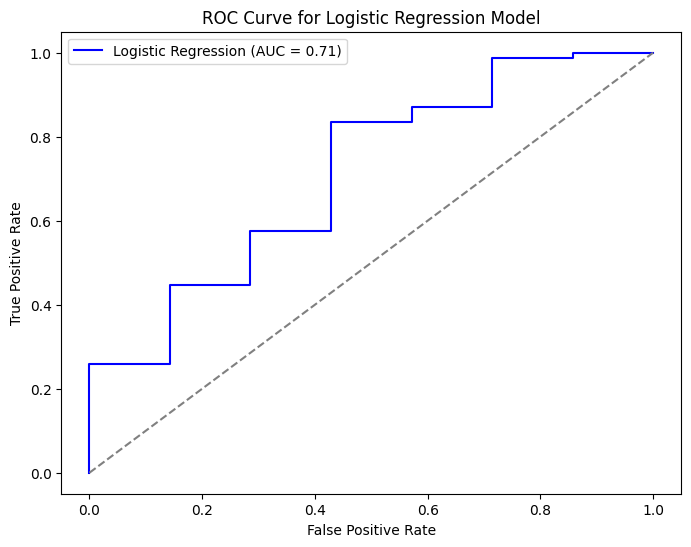

In [2]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
gse48581 = pd.read_csv('GSE48581.csv')
data = gse48581

# Remove non-numeric columns, typically the first column if it's an identifier
data = data.drop(data.columns[0], axis=1)  # Assuming the first column is the identifier


# Encode 'Rejection Status'
data["Label"] = data["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

# Split the data into features and target
X = data[["WDR3", "LOC100507073", "SCMH1"]]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

AUC: 0.7630252100840336


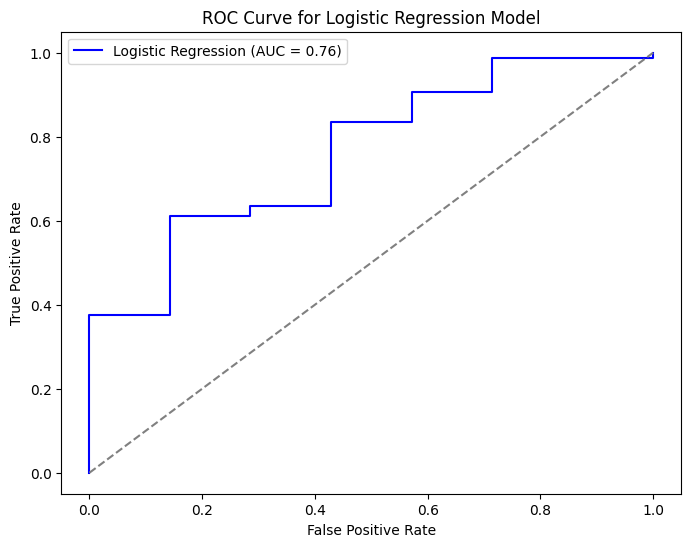

In [6]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
gse48581 = pd.read_csv('GSE48581.csv')
data = gse48581

# Remove non-numeric columns, typically the first column if it's an identifier
data = data.drop(data.columns[0], axis=1)  # Assuming the first column is the identifier


# Encode 'Rejection Status'
data["Label"] = data["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

# Split the data into features and target
X = data[["FAM26F.1", "B2M.2"]]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

AUC: 0.6436974789915967


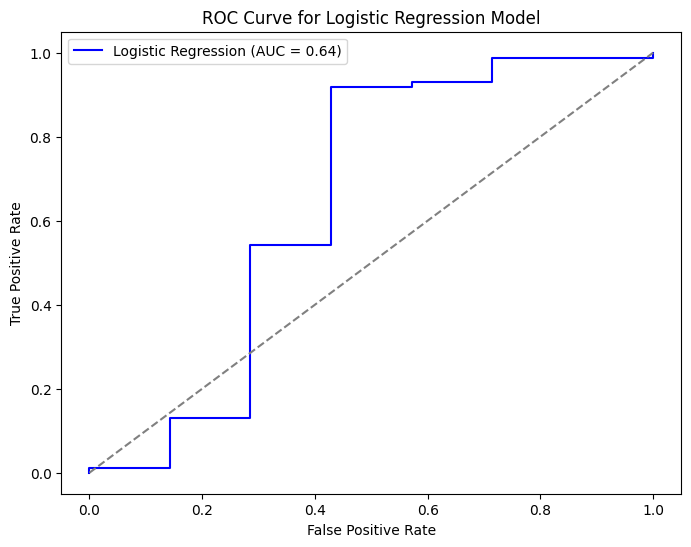

In [8]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
gse48581 = pd.read_csv('GSE48581.csv')
data = gse48581

# Remove non-numeric columns, typically the first column if it's an identifier
data = data.drop(data.columns[0], axis=1)  # Assuming the first column is the identifier


# Encode 'Rejection Status'
data["Label"] = data["Diagnosis"].apply(lambda x: 1 if x in ["non-TCMR"] else 0)

# Split the data into features and target
X = data[["GIMAP1", "CCL5"]]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')

AUC: 0.7999999999999999


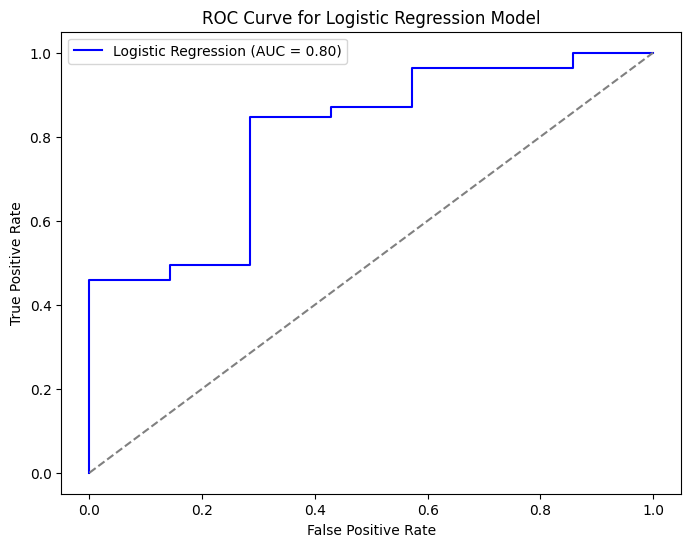

In [4]:
import matplotlib.pyplot as plt # Import pyplot
from sklearn.metrics import roc_curve # Import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # 参考线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.show()